In [14]:
import pandas as pd

In [15]:
df=pd.read_excel("nlsw88.xlsx")

In [16]:
df.head()

,idcode,age,race,married,never_married,grade,collgrad,south,smsa,c_city,industry,occupation,union,wage,hours,ttl_exp,tenure
0,1,37,Black,Single,Has been married,12.0,Not college grad,Not south,SMSA,Not central city,Transport/Comm/Utility,Operatives,Union,11.739130,48.0,10.33333,5.333333
1,2,37,Black,Single,Has been married,12.0,Not college grad,Not south,SMSA,Central city,Manufacturing,Craftsmen,Union,6.400963,40.0,13.62179,5.250000
2,3,42,Black,Single,Never married,12.0,Not college grad,Not south,SMSA,Central city,Manufacturing,Sales,Union,5.016723,40.0,17.73077,1.250000
3,4,43,White,Married,Has been married,17.0,College grad,Not south,SMSA,Not central city,Professional services,Other,Union,9.033813,42.0,13.21154,1.750000
4,6,42,White,Married,Has been married,12.0,Not college grad,Not south,SMSA,Not central city,Manufacturing,Operatives,Nonunion,8.083731,48.0,17.82051,17.750000


In [17]:
df=df.dropna()

In [18]:
df

,idcode,age,race,married,never_married,grade,collgrad,south,smsa,c_city,industry,occupation,union,wage,hours,ttl_exp,tenure
0,1,37,Black,Single,Has been married,12.0,Not college grad,Not south,SMSA,Not central city,Transport/Comm/Utility,Operatives,Union,11.739130,48.0,10.33333,5.333333
1,2,37,Black,Single,Has been married,12.0,Not college grad,Not south,SMSA,Central city,Manufacturing,Craftsmen,Union,6.400963,40.0,13.62179,5.250000
2,3,42,Black,Single,Never married,12.0,Not college grad,Not south,SMSA,Central city,Manufacturing,Sales,Union,5.016723,40.0,17.73077,1.250000
3,4,43,White,Married,Has been married,17.0,College grad,Not south,SMSA,Not central city,Professional services,Other,Union,9.033813,42.0,13.21154,1.750000
4,6,42,White,Married,Has been married,12.0,Not college grad,Not south,SMSA,Not central city,Manufacturing,Operatives,Nonunion,8.083731,48.0,17.82051,17.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2240,5152,35,White,Married,Has been married,13.0,Not college grad,South,Not SMSA,Not central city,Professional services,Sales,Union,5.032206,40.0,14.48077,6.833333
2242,5154,44,White,Married,Has been married,16.0,College grad,South,SMSA,Not central city,Professional services,Professional/Technical,Nonunion,14.323670,40.0,12.70513,12.166670
2243,5156,42,White,Married,Has been married,12.0,Not college grad,South,Not SMSA,Not central city,Business/Repair svc,Sales,Nonunion,3.824476,40.0,18.85897,9.583333
2244,5157,38,Black,Married,Has been married,12.0,Not college grad,South,Not SMSA,Not central city,Professional services,Laborers,Nonunion,2.447664,35.0,11.16026,10.750000


In [19]:
pip install lifelines  pandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [21]:
df['event']=1

In [22]:

kmf=KaplanMeierFitter()
plt.figure()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

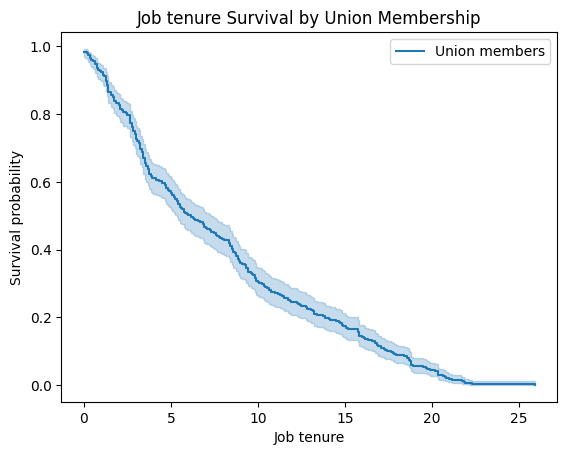

In [23]:
#Union members
union_group=df[df['union']=='Union']
kmf.fit(durations=union_group['tenure'],
        event_observed=union_group['event'],
        label='Union members')
kmf.plot_survival_function()
plt.title("Job tenure Survival by Union Membership")
plt.xlabel("Job tenure")
plt.ylabel("Survival probability")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

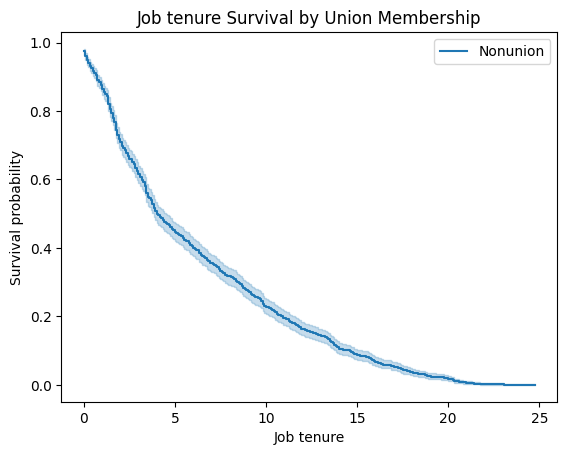

In [24]:
#Nonunion members
non_union_group=df[df['union']=='Nonunion']
kmf.fit(
    durations=non_union_group['tenure'],
    event_observed=non_union_group['event'],
    label='Nonunion'
)
kmf.plot_survival_function()
plt.title("Job tenure Survival by Union Membership")
plt.xlabel("Job tenure")
plt.ylabel("Survival probability")
plt.show

In [25]:
results=logrank_test(union_group['tenure'],
                     non_union_group['tenure'],
                     event_observed_A=union_group['event'],
                    event_observed_B=non_union_group['event'])

In [26]:
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          29.56 <0.005     24.14

In [28]:
results.p_value

np.float64(5.411527994726185e-08)